<a href="https://colab.research.google.com/github/AnnaSokolova27/House-Prices-/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказания стоимости недвижимости

Нам предоставлены два набора данных train и test. Обучающие данные содержат 1460 записей и 79 признаков, а тестовые данные содержат 1459 записей и 79 переменных. В данных train указаны цены продажи домов 'SalePrice'. Используя данные train, мы должны создать усовершенствованную регрессионную модель, которая может точно предсказать цену продажи дома при заданных значениях всех переменных. И эта модель будет использоваться для прогнозирования продажной цены образцов в тестовом наборе.

Краткое описание данных.

**SalePrice** - цена продажи недвижимости в долларах. Это целевая переменная, которую нам надо предсказать.
**MSSubClass** : класс здания.
**MSZoning** : Общая классификация зонирования.
**LotArea** : Размер участка в квадратных футах.
**BldgType** : Тип жилья.
**OverallQual** : общее качество материала и отделки.
**YearBuilt** : Первоначальная дата постройки.
**YearRemodAdd** : Дата реконструкции.
**Foundation** : Тип фундамента.
**BsmtQual** : Высота подвала.
**BsmtCond** : Общее состояние подвала.
**Heating** : Тип отопления.
**CentralAir** : Центральное кондиционирование воздуха.

И много других данных, описываемых продаваемое жилье.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Ограничение вывода значений с плавающей точкой до 3 знаков после запятой
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [ ]:
# Убираем ограничения на число столбцов, которые будет выводить pandas, чтобы было удобнее анализировать данные
pd.set_option('display.max_columns', None)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print("Размер данных train до удаления столбца Id равен : {} ".format(train.shape))
print("Размер данных test до удаления столбца Id равен : {} ".format(test.shape))

# Сохраним столбец Id в новые переменные в обучающей и тестовой выборке
train_ID = train['Id']
test_ID = test['Id']

# Теперь удалим столбец Id, поскольку в нем нет необходимости для процесса прогнозирования.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nРазмер данных train после удаления столбца Id равен : {} ".format(train.shape))
print("Размер данных test после удаления столбца Id равен : {} ".format(test.shape))

Размер данных train до удаления столбца Id равен : (1460, 81) 
Размер данных test до удаления столбца Id равен : (1459, 80) 

Размер данных train после удаления столбца Id равен : (1460, 80) 
Размер данных test после удаления столбца Id равен : (1459, 79) 


<Axes: >

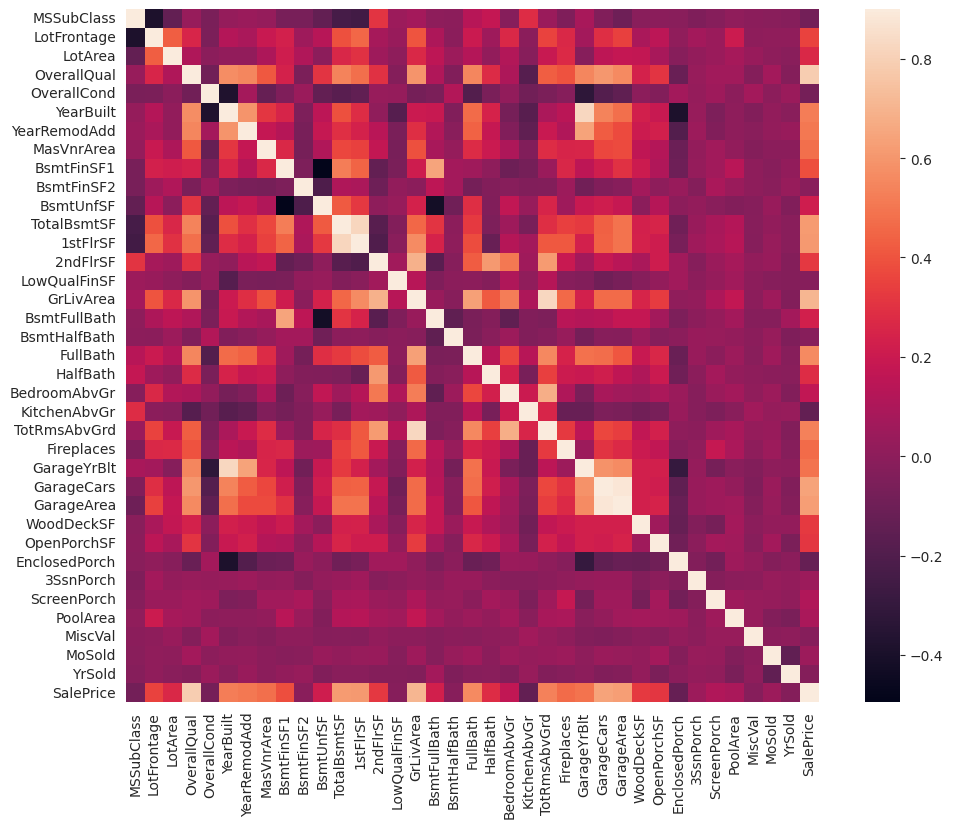

In [ ]:
# Посмотрим, с какими признаками коррелирует целевая переменная SalePrice:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

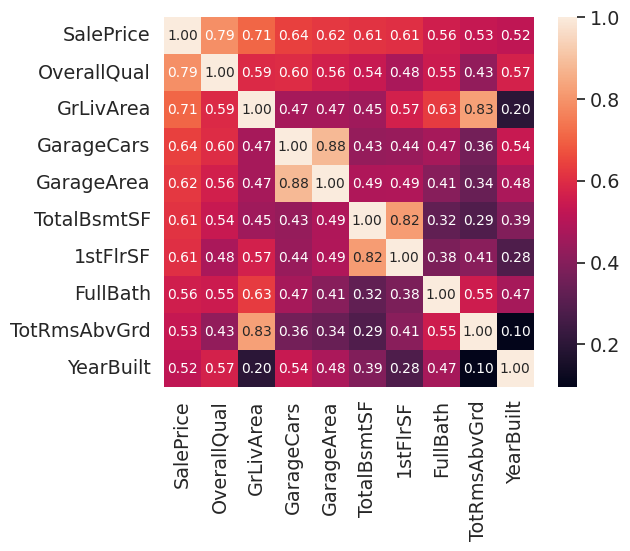

In [ ]:
# Попробуем усеченный вариант и сократим количество коррелирующих признаков до 10:
k = 10 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Все значения меньше 0.9, так что с точки зрения корреляции все признаки можно оставить.

Лучше всего SalePrice коррелирует с GrLivArea и OverallQual. Проверим эти два признака на наличие выбросов:

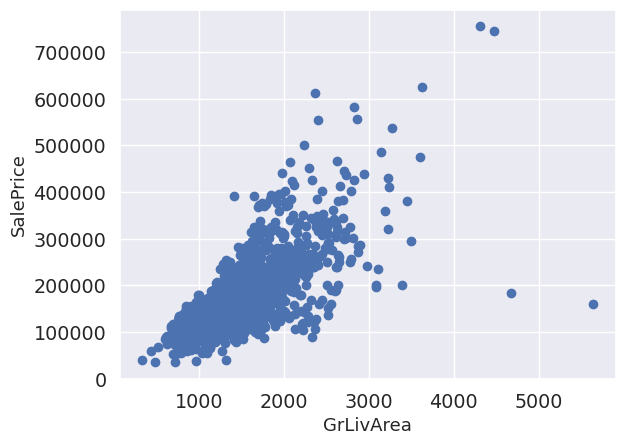

In [ ]:
# 'GrLivArea'
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

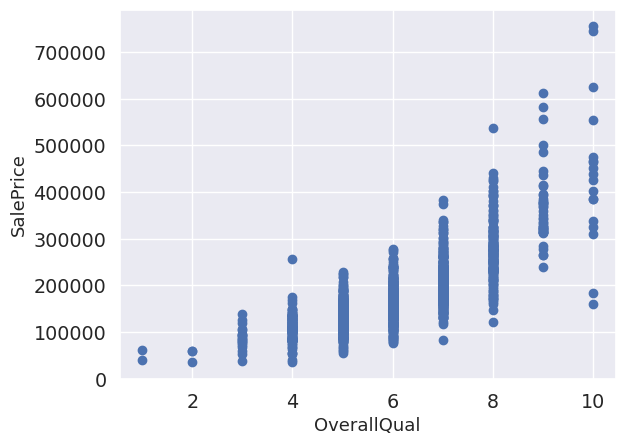

In [ ]:
# 'OverallQual'
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

Выбросы незначительны, мы не будем их удалять.



In [ ]:
# посмотим на нашу целевую переменную SalePrice
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64


Создается впечатление, что цена дома существенно отклоняется от нормального распределения:

*   Стандартное отклонение слишком велико.
*   Минимум больше 0 (что логично для цен на недвижимость).
*   Существует большая разница между минимальным значением и 25-м процентилем.
*   Разница между 75-м процентилем и максимумом больше, чем 25-й процентиль и минимум.


Для проверки распределения будем использовать гистограмму распределения переменной и QQ-plot. QQ-plot используется для сравнения двух распределений путем построения их квантилей относительно друг друга. В данном случае это будут квантили теоретического распределения и распределения переменной. В случае нормального распределения оно на QQ-plot должно повторять диагональ теоретического.


 mu = 180921.20 and sigma = 79415.29



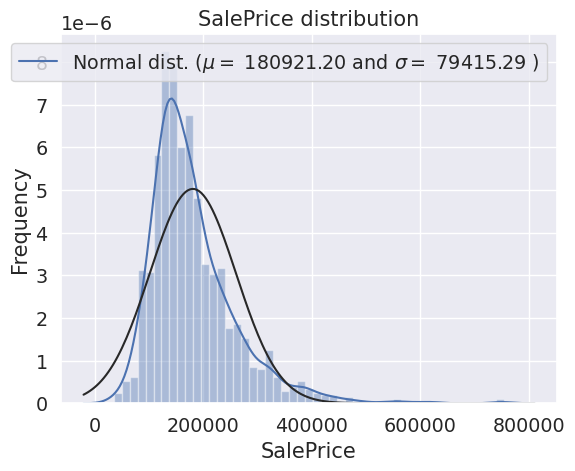

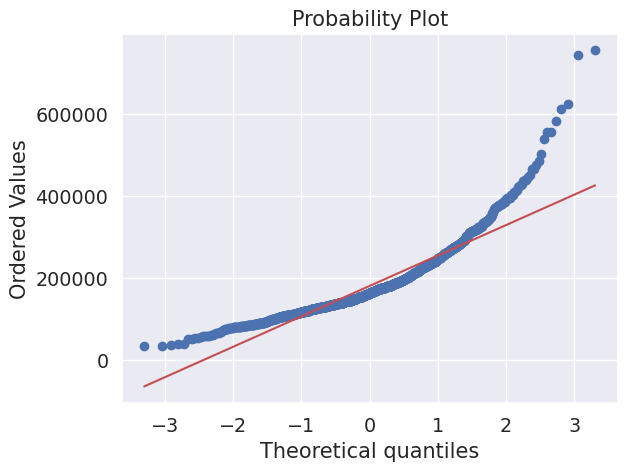

In [ ]:
# Посмотрим с каким распределением мы имеем дело
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
# Рассчитываем асимметрию и эксцесс
print("Ассиметрия: %f" % train['SalePrice'].skew())
print("Эксцесс: %f" % train['SalePrice'].kurt())

Ассиметрия: 1.882876
Эксцесс: 6.536282


Распределение смещено вправо. Это подтверждает положительное значение асимметрии. Эксцесс равен 6.5, что говорит о большей сосредоточенности значений возле среднего, то есть о более острой вершине, чем у нормального распределения.

Для того чтобы сделать распределение более симметричным, гладким и приближенным к нормальному, мы выполним логарифмическое преобразование целевой переменной. Цель состоит в том, чтобы приблизить подход к представлению данных к желаемой гипотезе, чтобы сделать лучший статистический вывод.


 mu = 12.02 and sigma = 0.40



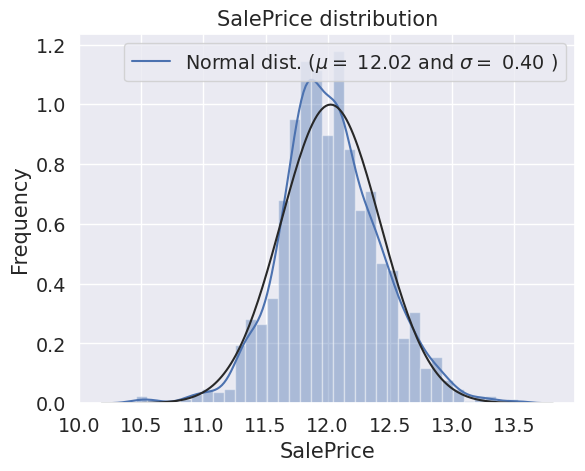

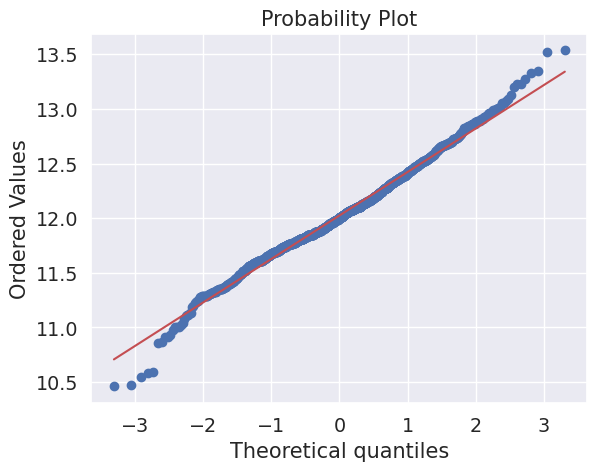

In [ ]:
# Применим логарифмическое преобразование для SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

# посмотрим теперь на графики (после логарифмического преобразования)
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Теперь на графиках видно, что распределение действительно стало более приближенным к нормальному.

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
# Сохраним целевую переменную из тренировочного датасета в отдельную переменную
y_train = train.SalePrice

# Соединяем тренировочный и тестовый датасеты, чтобы провести наши преобразования на всех данных
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True) # Удаляем целевую переменную из объединенного датасета
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [ ]:
# Определим функцию для просмотра пропущенных данных всего и в процентах

def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

all_data_na1 = missingValuesInfo(all_data)
all_data_na1

,Total,Percent
PoolQC,2909,99.660
MiscFeature,2814,96.400
Alley,2721,93.220
Fence,2348,80.440
FireplaceQu,1420,48.650
LotFrontage,486,16.650
GarageYrBlt,159,5.450
GarageFinish,159,5.450
GarageQual,159,5.450
GarageCond,159,5.450


Text(0.5, 1.0, 'Топ-20 пропущенных значений  (%)')

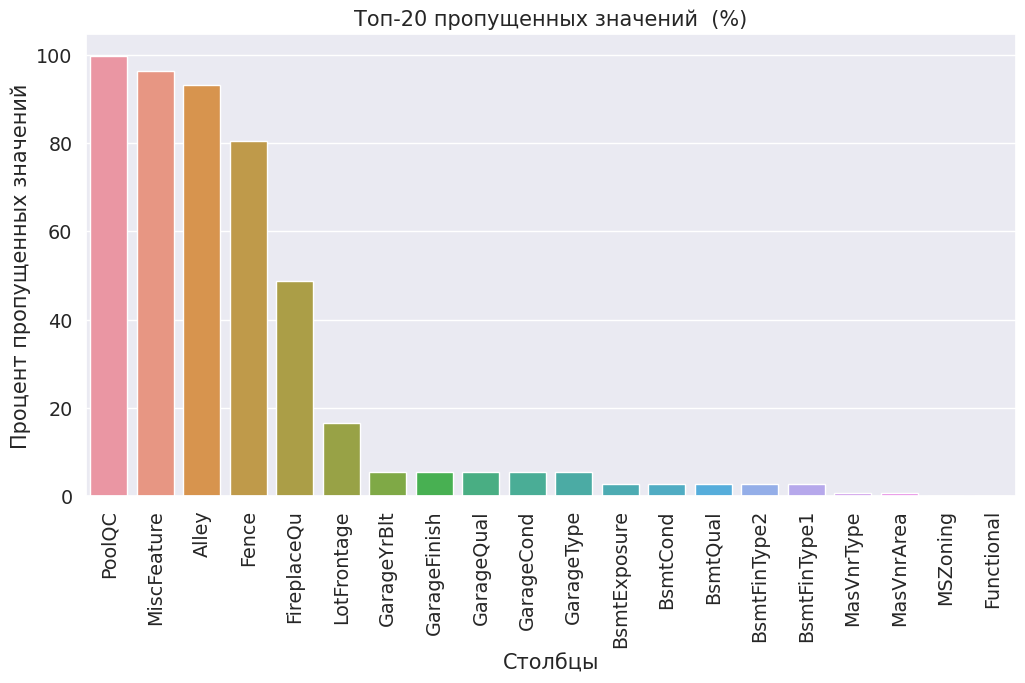

In [ ]:
# Визуализируем (на диаграмме масштаб пропущенных значений будет виден лучше)
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na1[:20].index, y=all_data_na1['Percent'][:20])
plt.xlabel('Столбцы', fontsize=15)
plt.ylabel('Процент пропущенных значений', fontsize=15)
plt.title('Топ-20 пропущенных значений  (%)', fontsize=15)

In [ ]:
# Заменим пропущенные значения в категориальных признаках значением 'None' или часто встречающимся значением (mode)
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:
# Значения в числовых признаках заменим медианой или нулем
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"] \
    .transform(lambda x: x.fillna(x.median()))
for col in ('GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
# Удалим два столбца
all_data = all_data.drop(['Utilities'], axis=1) # одинаковое значение практически во всех строках
all_data = all_data.drop(['GarageYrBlt'], axis=1) # многие его записи совпадают со столбцом YearBuilt

In [ ]:
# Проверим остались ли у нас пропущенные значения
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
# В датасете присутствуют категориальные признаки, которые выражены числами и распознаются как числовые, поменяем им тип
# MSSubClass - Класс здания
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# OverallCond - Общая оценка состояния
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# MoSold - месяц продажи и YrSold - год продажи
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
# Закодируем часть категориальных признаков с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))


print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 77)


In [ ]:
# Добавим новые признаки
# Поскольку характеристики, связанные с площадью, очень важны для определения цен на жилье, мы добавляем еще одну характеристику,
# которая представляет собой общую площадь подвала, первого и второго этажей каждого дома
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Дата постройки и реконструкции
all_data['YearBuiltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

In [ ]:
# Проверим перекос всех числовых признаков
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947
PoolArea,16.898
LotArea,12.822
LowQualFinSF,12.089
3SsnPorch,11.376
LandSlope,4.975
KitchenAbvGr,4.302
BsmtFinSF2,4.146
EnclosedPorch,4.004
ScreenPorch,3.947


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("Имеется {} искаженных числовых признаков для преобразования".format(skewness.shape[0]))

# Преобразуем с помощью Box Cox искаженные числовые признаки
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

Имеется 59 искаженных числовых признаков для преобразования


In [ ]:
# Закодируем оставшиеся категориальные признаки с помощью OHE
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [ ]:
# Разделим объединенный датасет на тестовую и обучающую выборку
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

In [ ]:
y = y_train

In [ ]:
# Установим catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.3 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
import catboost as cb
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Настройка cross validation folds:
kf = KFold(n_splits=12, shuffle=True, random_state=11)

In [ ]:
# определим функцию критерия ошибок через кросс-валидацию, чтобы при проверке избежать переобучение:

def cv_rmse(model, X=X_train):
    return np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error", cv=kf))

In [ ]:
def cv_max_error(model, X=X_train):
    return np.sqrt(-cross_val_score(model, X, y,
                                    scoring="max_error", cv=kf))

Построим модели

In [ ]:
ridge_cv = RidgeCV(alphas = (0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
ridge_cv.fit(X_train, y)
ridge_cv_preds = ridge_cv.predict(X_test)

In [ ]:
score_ridge = cv_rmse(ridge_cv)
print(f"ridge: {np.expm1(score_ridge.mean())}")

ridge: 0.13642538600062729


In [ ]:
score_ridge = cv_max_error(ridge_cv)
print(f"ridge: {np.expm1(score_ridge.mean())}")

ridge: 1.2145118148761362


In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=800, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, y)
xgb_preds = model_xgb.predict(X_test)

In [ ]:
score_xgb = cv_rmse(model_xgb)
print(f"xgboost: {score_xgb.mean()}")

xgboost: 0.1261007101236434


In [ ]:
model_cb = cb.CatBoostRegressor(verbose=0)
model_cb.fit(X_train, y)
cb_preds = model_cb.predict(X_test)

In [ ]:
score_cb = cv_rmse(model_cb)
print(f"CatBoost: {score_cb.mean()}")

CatBoost: 0.1220019810130124


In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=6, n_estimators=400, max_bin = 55)
model_lgb.fit(X_train, y)
lgb_preds = model_lgb.predict(X_test)

In [ ]:
score_lgb = cv_rmse(model_lgb)
print(f"lightgbm: {score_lgb.mean()}")

lightgbm: 0.12997559280582283


In [ ]:
model_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4,
                                        max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber')
model_boost.fit(X_train, y)
boost_preds = model_boost.predict(X_test)

In [ ]:
score_boost = cv_rmse(model_boost)
print(f"GradientBoost: {score_boost.mean()}")

GradientBoost: 0.12459879375784944


Посмотрим какие признаки наши модели считают наиболее важными

In [ ]:
feature_importances_1 = pd.DataFrame(sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: -x[1]))
feature_importances_1.head(5)

,0,1
0,GarageCars,0.109
1,OverallQual,0.092
2,Fireplaces,0.071
3,TotalSF,0.070
4,MSZoning_RL,0.054


In [ ]:
feature_importances_2 = pd.DataFrame(sorted(zip(X_train.columns, model_cb.feature_importances_), key=lambda x: -x[1]))
feature_importances_2.head(5)

,0,1
0,TotalSF,20.539
1,OverallQual,16.324
2,GrLivArea,5.110
3,YearBuiltAndRemod,3.648
4,LotArea,3.494


In [ ]:
feature_importances_3 = pd.DataFrame(sorted(zip(X_train.columns, model_lgb.feature_importances_), key=lambda x: -x[1]))
feature_importances_3.head(5)

,0,1
0,LotArea,111
1,TotalSF,101
2,OverallQual,89
3,EnclosedPorch,77
4,OverallCond,73


In [ ]:
feature_importances_4 = pd.DataFrame(sorted(zip(X_train.columns, model_boost.feature_importances_), key=lambda x: -x[1]))
feature_importances_4.head(5)

,0,1
0,TotalSF,0.088
1,GrLivArea,0.086
2,OverallQual,0.081
3,YearBuilt,0.070
4,GarageCars,0.048


Приведённые выше данные важности признаков показывают, что на выбранных данных наши модели ведут себя схожим образом и отбирают почти одни и те же признаки, как наиболее важные.

Полученные данные важности признаков можно использовать, например, для ручного сокращения размерности данных или просто наглядного представления зависимости целевой переменной от определённых признаков.

Что мы сейчас и попробуем сделать и посмотрим как изменяться наши оценки.



In [ ]:
# Выберем все признаки наших моделей, которые имели важность больше 0
xgb_cols = X_train.columns[model_xgb.feature_importances_ > 0]
cb_cols = X_train.columns[model_cb.feature_importances_ > 0]
lgb_cols = X_train.columns[model_lgb.feature_importances_ > 0]
boost_cols = X_train.columns[model_boost.feature_importances_ > 0]

selected_features = list(set(xgb_cols) & set(cb_cols) & set(lgb_cols) & set(boost_cols))
print(selected_features)

['WoodDeckSF', 'GarageType_Attchd', 'Fireplaces', '2ndFlrSF', 'Exterior1st_MetalSd', 'LotConfig_FR2', 'BsmtFinType1', 'SaleCondition_Family', 'TotRmsAbvGrd', 'BsmtUnfSF', 'BsmtFinSF1', 'EnclosedPorch', 'MSZoning_RM', 'ExterQual', 'LandContour_Low', 'BedroomAbvGr', 'LotShape', 'KitchenQual', 'BsmtFinType2', 'RoofStyle_Gable', 'PavedDrive', 'ExterCond', 'GrLivArea', 'MoSold', 'YearRemodAdd', 'GarageCars', 'MasVnrType_Stone', 'Electrical_SBrkr', 'Neighborhood_OldTown', 'SaleType_New', 'Foundation_PConc', 'FireplaceQu', 'Condition1_Artery', 'Neighborhood_IDOTRR', 'Neighborhood_Sawyer', 'SaleType_WD', 'OpenPorchSF', 'GarageArea', 'Neighborhood_Edwards', 'YrSold', '1stFlrSF', 'Alley', 'LotFrontage', 'SaleCondition_Normal', 'Exterior1st_Wd Sdng', 'Neighborhood_StoneBr', 'OverallCond', 'LandContour_Bnk', 'MSZoning_RL', 'LowQualFinSF', 'GarageFinish', 'Fence', 'Neighborhood_BrkSide', 'Neighborhood_NAmes', 'Exterior1st_Plywood', 'CentralAir', 'TotalBsmtSF', 'Exterior1st_BrkFace', 'LotConfig_CulD

In [ ]:
# Выберем только эти признаки у обучающего и тестового датасетов

X_test1 = X_test[selected_features]
X_train1 = X_train[selected_features]

In [ ]:
# определим функцию критерия ошибок:

def cv_rmse1(model, X=X_train1):
    return np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error", cv=kf))

In [ ]:
ridge_cv1 = RidgeCV(alphas = (0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
ridge_cv1.fit(X_train1, y)
ridge_cv_preds1 = ridge_cv1.predict(X_test1)

In [ ]:
score_ridge1 = cv_rmse1(ridge_cv1)
print(f"ridge: {score_ridge1.mean()}")

ridge: 0.12637669440578334


In [ ]:
model_xgb1 = xgb.XGBRegressor(n_estimators=800, max_depth=2, learning_rate=0.1)
model_xgb1.fit(X_train1, y)
xgb_preds1 = model_xgb1.predict(X_test1)

In [ ]:
score_xgb1 = cv_rmse1(model_xgb1)
print(f"xgboost: {score_xgb1.mean()}")

xgboost: 0.12847074915735066


In [ ]:
model_cb1 = cb.CatBoostRegressor(verbose=0)
model_cb1.fit(X_train1, y)
cb_preds1 = model_cb1.predict(X_test1)

In [ ]:
score_cb1 = cv_rmse1(model_cb1)
print(f"CatBoost: {score_cb1.mean()}")

CatBoost: 0.12250652195097861


In [ ]:
model_lgb1 = lgb.LGBMRegressor(objective='regression', num_leaves=6, n_estimators=400, max_bin = 55)
model_lgb1.fit(X_train1, y)
lgb_preds1 = model_lgb1.predict(X_test1)

In [ ]:
score_lgb1 = cv_rmse1(model_lgb1)
print(f"lightgbm: {score_lgb1.mean()}")

lightgbm: 0.12972632056733044


In [ ]:
model_boost1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4,
                                        max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber')
model_boost1.fit(X_train1, y)
boost_preds1 = model_boost1.predict(X_test1)

In [ ]:
score_boost1 = cv_rmse1(model_boost1)
print(f"GradientBoost: {score_boost1.mean()}")

GradientBoost: 0.12271691803871794


In [ ]:
# Так как модели ведут себя схожим образом для решающего предсказания возьмем среднее арифметическое предсказаний этих моделей

In [ ]:
predictions = np.floor(np.expm1((lgb_preds + boost_preds + xgb_preds + ridge_cv_preds + cb_preds) / 5)) # до применения важности признаков

In [ ]:
predictions1 = np.floor(np.expm1((lgb_preds1 + boost_preds1 + xgb_preds1 + ridge_cv_preds1 + cb_preds1) / 5)) # после применения важности признаков

In [ ]:
print(f"RMSE: {np.sqrt(mean_squared_error(y[:1459], predictions))}")

RMSE: 192805.36106995973


In [ ]:
print(f"RMSE: {np.sqrt(mean_squared_error(y[:1459], predictions1))}")

RMSE: 193057.30647674145


Мы видим, что наш результат немного улучшился при уменьшении количества признаков. Следовательно, для пердсказания цены мы используем вариант, в котором присутствуют только признаки, выбранные нами как важные.

In [ ]:
submission = {
    'Id': test_ID,
    'SalePrice': predictions1
}
solution = pd.DataFrame(submission)
solution.to_csv('submission.csv',index=False)

In [ ]:
submission=pd.read_csv('submission.csv')
submission

,Id,SalePrice
0,1461,118888.000
1,1462,163690.000
2,1463,186629.000
3,1464,200106.000
4,1465,189381.000
...,...,...
1454,2915,82934.000
1455,2916,85230.000
1456,2917,164110.000
1457,2918,119474.000


In [ ]:
import pickle

# Сохраняем модель
with open('model.pkl', 'wb') as f:
  pickle.dump(predictions1, f)

# Загружаем модель
with open('model.pkl', 'rb') as f:
  model_1 = pickle.load(f)

In [ ]:
model_1

array([118888., 163690., 186629., ..., 164110., 119474., 223381.])



Наш результат на Kaggle при использовании второго варианта:

место 125, результат 0,11745


---



При использовании первого:

место 199, результат 0,11923